In [66]:
import pandas as pd
import matplotlib.pyplot as plt

In [67]:
df = pd.read_csv('player_stats_cleaned.csv')

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Columns: 167 entries, Player_id to Sets_per_Match
dtypes: bool(2), float64(130), int64(33), object(2)
memory usage: 129.2+ KB


In [69]:
new_df = df[['Titles', 'Grand_Slam', 'Masters', 'Finals']]

In [70]:
new_df = df[['1st_Serve_%', '1st_Serve_Won_%', '2nd_Serve_Won_%', 'Points_per_Service_Game', 'Service_Games_Won_%']]

In [71]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
1st_Serve_%                100 non-null float64
1st_Serve_Won_%            100 non-null float64
2nd_Serve_Won_%            100 non-null float64
Points_per_Service_Game    100 non-null float64
Service_Games_Won_%        100 non-null float64
dtypes: float64(5)
memory usage: 4.0 KB


In [72]:
#K means Clustering 
def doKmeans(X, nclust=2):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

clust_labels, cent = doKmeans(new_df, 5)
kmeans = pd.DataFrame(clust_labels)
new_df.insert((new_df.shape[1]),'kmeans',kmeans)

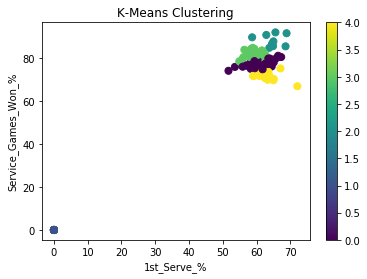

In [73]:
#Plot the clusters obtained using k means
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(new_df['1st_Serve_%'],	new_df['Service_Games_Won_%'],
                     c=kmeans[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('1st_Serve_%')
ax.set_ylabel('Service_Games_Won_%')
plt.colorbar(scatter)
